In [ ]:
TASK 11(1)

In [1]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None

class HashTableChaining:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size

    def _hash(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self._hash(key)
        head = self.table[index]

        while head:
            if head.key == key:
                head.value = value  
                return
            head = head.next

        new_node = Node(key, value)
        new_node.next = self.table[index]
        self.table[index] = new_node

    def get(self, key):
        index = self._hash(key)
        head = self.table[index]
        while head:
            if head.key == key:
                return head.value
            head = head.next
        return None

    def delete(self, key):
        index = self._hash(key)
        head = self.table[index]
        prev = None

        while head:
            if head.key == key:
                if prev:
                    prev.next = head.next
                else:
                    self.table[index] = head.next
                return
            prev = head
            head = head.next


In [2]:
class HashTableLinearProbing:
    def __init__(self, size):
        self.size = size
        self.table = [None] * size
        self.deleted = object() 

    def _hash(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self._hash(key)
        for _ in range(self.size):
            if self.table[index] is None or self.table[index] is self.deleted:
                self.table[index] = (key, value)
                return
            elif self.table[index][0] == key:
                self.table[index] = (key, value)
                return
            index = (index + 1) % self.size
        raise Exception("Hash Table is full")

    def get(self, key):
        index = self._hash(key)
        for _ in range(self.size):
            if self.table[index] is None:
                return None
            if self.table[index] is not self.deleted and self.table[index][0] == key:
                return self.table[index][1]
            index = (index + 1) % self.size
        return None

    def delete(self, key):
        index = self._hash(key)
        for _ in range(self.size):
            if self.table[index] is None:
                return
            if self.table[index] is not self.deleted and self.table[index][0] == key:
                self.table[index] = self.deleted
                return
            index = (index + 1) % self.size


In [3]:

print("=== Chaining ===")
ht_chain = HashTableChaining(10)
ht_chain.insert("name", "Alice")
ht_chain.insert("age", 25)
print(ht_chain.get("name"))  
ht_chain.delete("age")
print(ht_chain.get("age"))   

print("\n=== Linear Probing ===")
ht_probe = HashTableLinearProbing(10)
ht_probe.insert("name", "Alice")
ht_probe.insert("age", 25)
print(ht_probe.get("name"))  
ht_probe.delete("age")
print(ht_probe.get("age"))  

=== Chaining ===
Alice
None

=== Linear Probing ===
Alice
None


In [ ]:
TASK 11(2)

In [4]:
def custom_hash(key, table_size=100):
    """
    A custom hash function using a polynomial rolling hash.
    """
    p = 31
    m = 1e9 + 9
    hash_value = 0
    p_pow = 1

    for c in key:
        hash_value = (hash_value + (ord(c) - ord('a') + 1) * p_pow) % m
        p_pow = (p_pow * p) % m

    return int(hash_value % table_size)


In [5]:
def builtin_hash(key, table_size=100):
    return hash(key) % table_size


In [6]:
import random
import string
from collections import defaultdict

def generate_random_keys(n, key_length=8):
    return [''.join(random.choices(string.ascii_lowercase, k=key_length)) for _ in range(n)]

def analyze_collisions(hash_function, keys, table_size=100):
    table = defaultdict(int)
    collisions = 0

    for key in keys:
        index = hash_function(key, table_size)
        if table[index] > 0:
            collisions += 1
        table[index] += 1

    return collisions, table


In [7]:
import matplotlib.pyplot as plt

def plot_distribution(table, title):
    indexes = list(table.keys())
    frequencies = list(table.values())

    plt.bar(indexes, frequencies)
    plt.xlabel("Hash Table Index")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()


Custom Hash Collisions: 900
Built-in Hash Collisions: 900


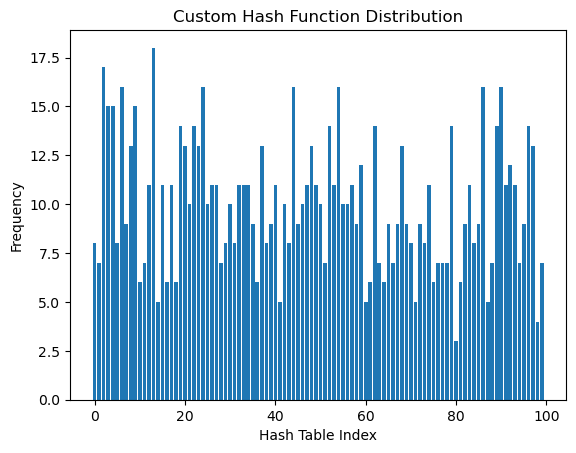

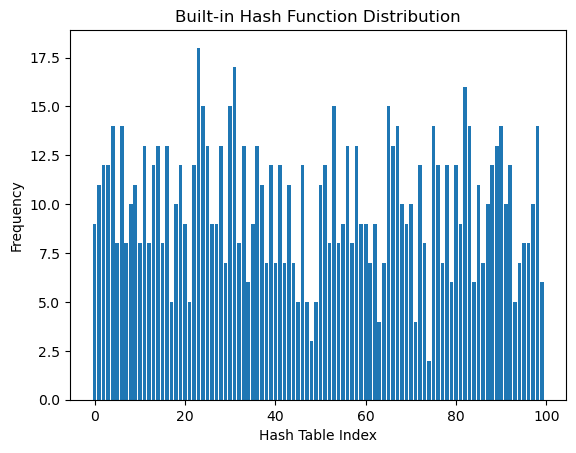

In [8]:
keys = generate_random_keys(1000)

collisions_custom, table_custom = analyze_collisions(custom_hash, keys)
collisions_builtin, table_builtin = analyze_collisions(builtin_hash, keys)

print("Custom Hash Collisions:", collisions_custom)
print("Built-in Hash Collisions:", collisions_builtin)

plot_distribution(table_custom, "Custom Hash Function Distribution")
plot_distribution(table_builtin, "Built-in Hash Function Distribution")


In [ ]:
TASK1 10(3)

In [9]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.prev = None
        self.next = None

class LRUCache:
    def __init__(self, capacity: int):
        self.capacity = capacity
        self.cache = {}  
        self.head = Node(0, 0)
        self.tail = Node(0, 0)
        self.head.next = self.tail
        self.tail.prev = self.head

    def _remove(self, node):
        """Remove node from linked list."""
        prev = node.prev
        nxt = node.next
        prev.next = nxt
        nxt.prev = prev

    def _add(self, node):
        """Add node right after head (most recently used)."""
        node.next = self.head.next
        node.prev = self.head
        self.head.next.prev = node
        self.head.next = node

    def get(self, key: int) -> str:
        if key in self.cache:
            node = self.cache[key]
            self._remove(node)
            self._add(node)  
            return node.value
        return -1

    def put(self, key: int, value: str) -> None:
        if key in self.cache:
            self._remove(self.cache[key])
        node = Node(key, value)
        self.cache[key] = node
        self._add(node)

        if len(self.cache) > self.capacity:
            lru = self.tail.prev
            self._remove(lru)
            del self.cache[lru.key]


In [12]:
cache = LRUCache(2)
cache.put(1, "A")
cache.put(2, "B")
print(cache.get(1))  
cache.put(3, "C")     
print(cache.get(2))   
print(cache.get(3))   


A
-1
C
